In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

**Import Libraries**

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

**Data Loading**

In [3]:
data_path = '/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz' #Specifies the path to the dataset.

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]


df = pd.read_csv(data_path,names=col_names, index_col=False) #Reads the dataset from the CSV file into a pandas DataFrame df

**Explore Data**

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.shape

(494021, 42)

In [6]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

**Data Preprocessing**

In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Find Categorical Columns**

In [9]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('label')


cate_cols

['flag', 'service', 'protocol_type']

**Categorical Features Distribution**

In [10]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

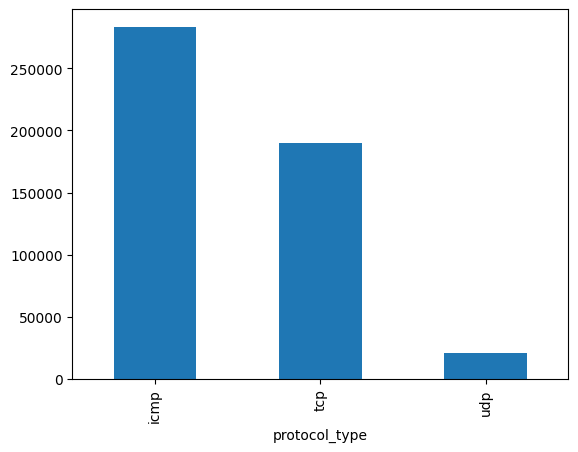

In [11]:
bar_graph('protocol_type')

ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

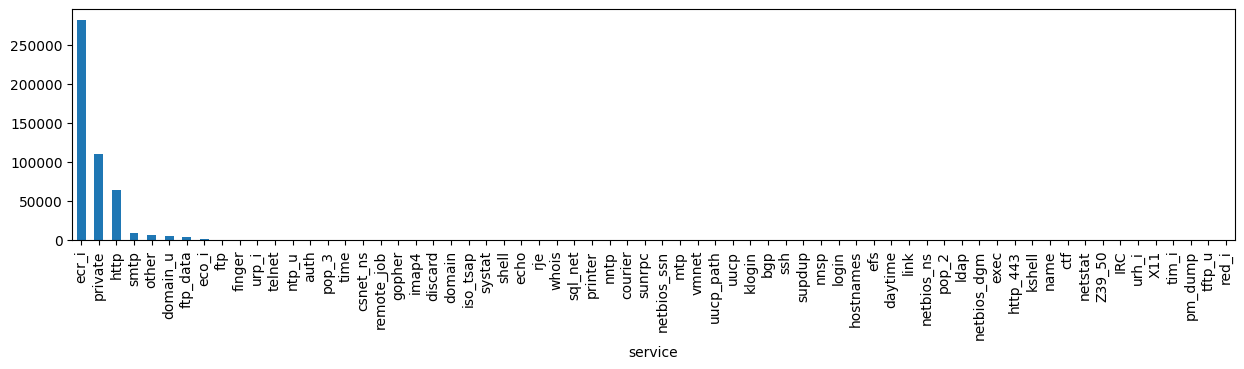

In [12]:
plt.figure(figsize=(15,3))
bar_graph('service')

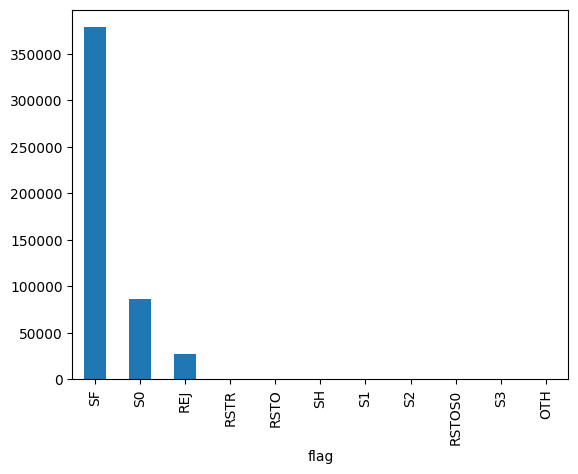

In [13]:
bar_graph('flag')

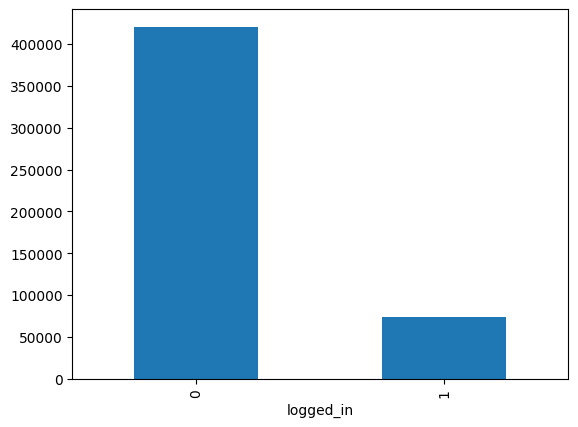

In [14]:
bar_graph('logged_in')

70000 packets are successfully logged in.

**Target Feature Distribution**

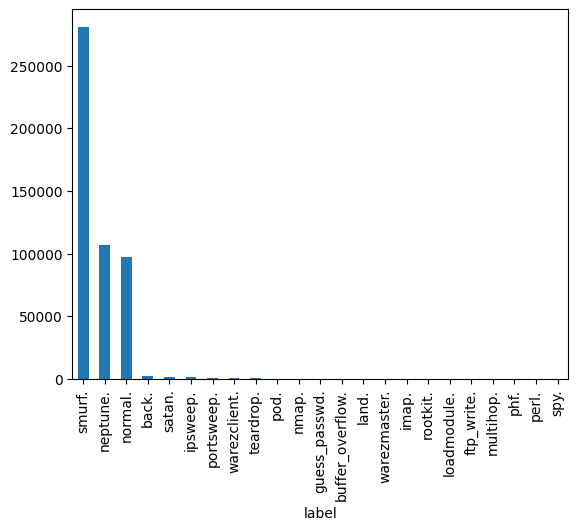

In [15]:
bar_graph('label')

Imbalanced Dataset: The dataset is heavily imbalanced. Certain attack types, like "smurf" and "neptune," dominate the dataset. These two types are represented by the tallest bars and seem to far outnumber other types of attacks and normal instances.

Minority Classes: Several attack types (like "buffer_overflow", "teardrop", "ipsweep", etc.) have very few instances. These minority classes might be underrepresented, which could pose challenges during model training as the model may not learn to detect these attacks well.

Normal Instances: The number of "normal" instances (shown on the left side) is also quite substantial but significantly smaller than the top attack types (e.g., "smurf" and "neptune").

**Label Encoding Categorical Columns**

In [16]:
label_enc = LabelEncoder()

In [17]:
df['protocol_type'] = label_enc.fit_transform(df['protocol_type'])
df['service'] = label_enc.fit_transform(df['service'])
df['flag'] = label_enc.fit_transform(df['flag'])

In [18]:
#Splitting features and target

X = df.drop(['label'], axis=1)  
y = label_enc.fit_transform(df['label'])
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [19]:
label_enc.inverse_transform(np.unique(y))

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

In [20]:
y_binary = np.where(y == 11, 0, 1)

In [21]:
np.unique(y_binary)

array([0, 1])

**Feature Selection**

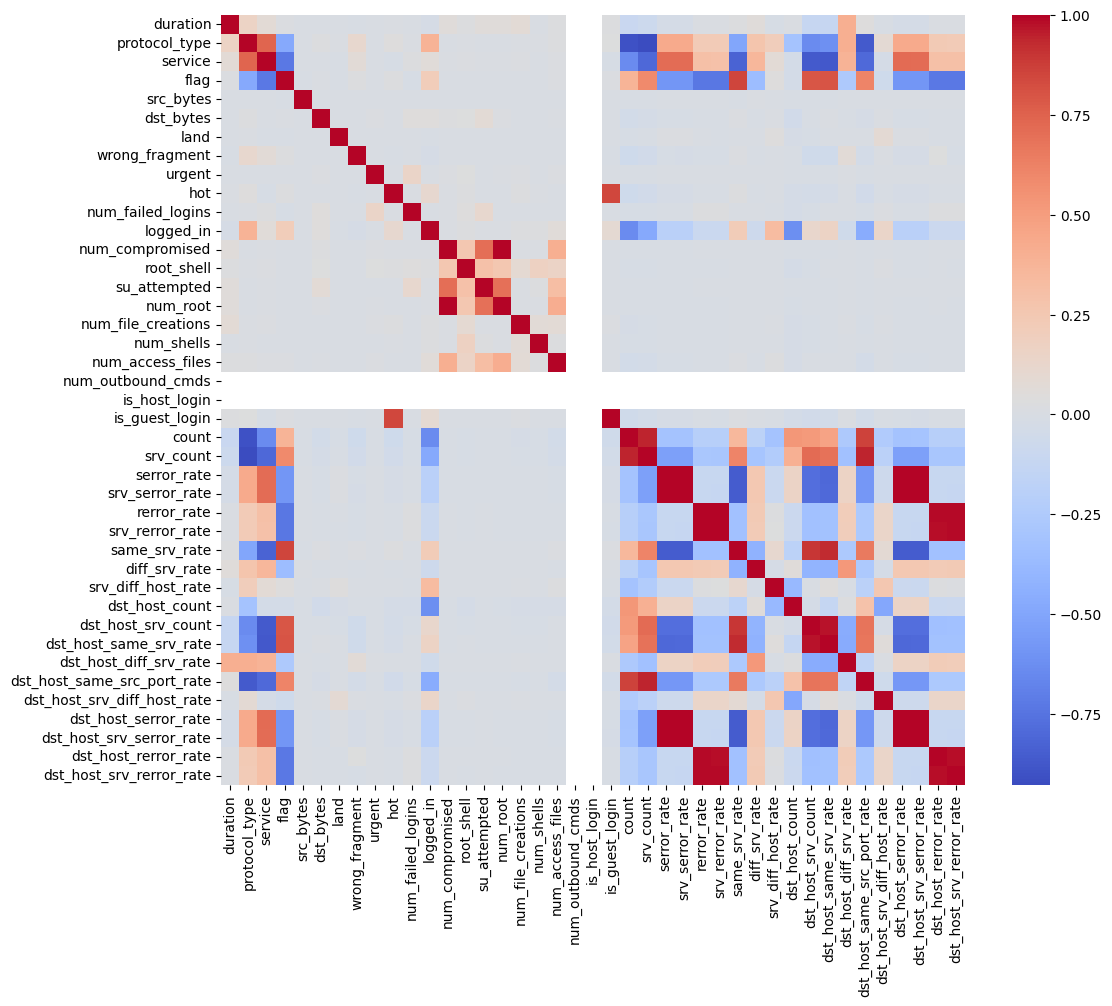

In [22]:
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

Removing highly correlated features (those with values near +1 or -1) and dropping some of them, as they provide redundant information. This can help reduce dimensionality and avoid multicollinearity in the model.

In [23]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [24]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [25]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [26]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [27]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [28]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [29]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [30]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [31]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [32]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [33]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [34]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [35]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [36]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [37]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [38]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [40]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

In [41]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [42]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [43]:
X.shape

(494021, 41)

In [44]:
X.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [45]:
X.shape

(494021, 41)

In [46]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_binary,train_size=1000, random_state=42, stratify=y_binary)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1000, 41)
Test set size: (493021, 41)


In [47]:
# Filter only normal samples for GAN training ( '0' is normal)
X_train_normal = X_train[y_train == 0]
X_train.shape

(1000, 41)

In [48]:
y_train.shape

(1000,)

**Data Normalisation**

Normalization is important when building a GAN, as it helps improve the training stability and performance of both the generator and discriminator. GANs, especially with architectures that use activation functions like tanh in the generator and sigmoid in the discriminator, benefit from normalized data.

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
df_normalized = scaler.fit_transform(X_train)  # Normalize all features

# Convert to a TensorFlow tensor
import tensorflow as tf

df_normalized_tensor = tf.convert_to_tensor(df_normalized, dtype=tf.float32)

In [50]:
def create_tf_dataset(data, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(data)
    dataset = dataset.shuffle(buffer_size=len(data))  # Shuffle the dataset
    dataset = dataset.batch(batch_size)  # Create batches
    return dataset

BATCH_SIZE = 64 # try 64 now
tf_dataset = create_tf_dataset(df_normalized_tensor, BATCH_SIZE) 

**Build GAN components**

In [51]:
def build_generator(noise_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(100,)),  # Input shape for noise
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(41, activation='tanh')  # Output layer for 41 features
    ])
    return model

noise_dim = 100  # Dimension of the noise vector
generator = build_generator(noise_dim)

# Test the generator
# Generate a random noise vector
test_noise = tf.random.normal([1, noise_dim])
generated_data = generator(test_noise)
print(generated_data.shape)

(1, 41)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(41,)),  # Adjust input shape if needed
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1) 
    ])
    return model

discriminator = build_discriminator()

In [53]:
from tensorflow.keras.losses import BinaryCrossentropy
cross_entropy = BinaryCrossentropy(from_logits=True) 



def generator_loss(fake_output):
    return -tf.reduce_mean(fake_output) # Wasserstein loss 

def discriminator_loss(real_output, fake_output):
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output) 

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-5) #Adjusted learning rate to improve the model
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)

In [54]:
@tf.function
def train_step(real_images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  # Create noise

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

**Train the Model**

In [55]:
history = {'gen': [], 'dis': []}

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:
            gen_loss, dis_loss = train_step(batch)

        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print('Time for epoch {} is {} sec '.format(epoch + 1, time.time() - start))

In [56]:
EPOCHS = 1000  # Set the number of epochs
train(tf_dataset, EPOCHS)

Time for epoch 1 is 6.349698781967163 sec 
Time for epoch 2 is 0.22527050971984863 sec 
Time for epoch 3 is 0.21718597412109375 sec 
Time for epoch 4 is 0.21807575225830078 sec 
Time for epoch 5 is 0.21937966346740723 sec 
Time for epoch 6 is 0.2213740348815918 sec 
Time for epoch 7 is 0.22876214981079102 sec 
Time for epoch 8 is 0.22234582901000977 sec 
Time for epoch 9 is 0.22219491004943848 sec 
Time for epoch 10 is 0.21970248222351074 sec 
Time for epoch 11 is 0.23113083839416504 sec 
Time for epoch 12 is 0.22524261474609375 sec 
Time for epoch 13 is 0.22211861610412598 sec 
Time for epoch 14 is 0.22424793243408203 sec 
Time for epoch 15 is 0.22525668144226074 sec 
Time for epoch 16 is 0.2245321273803711 sec 
Time for epoch 17 is 0.22208833694458008 sec 
Time for epoch 18 is 0.21729540824890137 sec 
Time for epoch 19 is 0.2314925193786621 sec 
Time for epoch 20 is 0.2614631652832031 sec 
Time for epoch 21 is 0.22145318984985352 sec 
Time for epoch 22 is 0.2193307876586914 sec 
Time

**Detecting Anomalies**

In [57]:
sample_size = 0.2

X_test_sampled = X_test.sample(frac=sample_size, random_state=42).reset_index(drop=True)
y_test_sampled = y_test[:X_test_sampled.shape[0]]

y_pred=discriminator.predict(X_test_sampled)

3082/3082 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


**Model Evaluation**

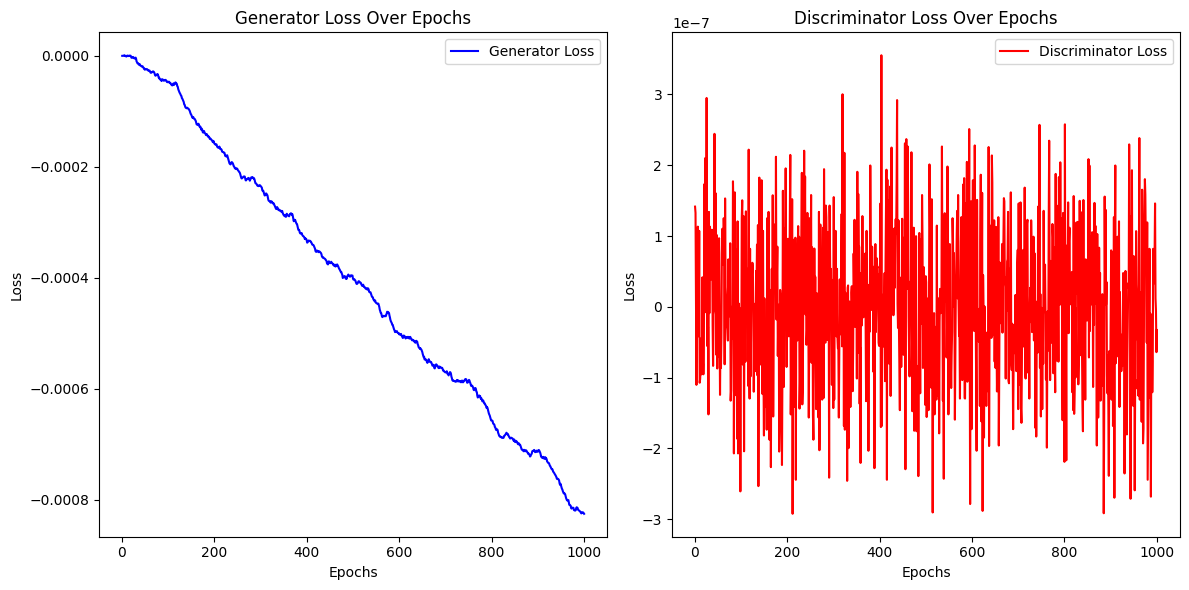

In [58]:
epochs = range(1, len(history['gen']) + 1)

plt.figure(figsize=(12, 6))

# Plot Generator Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history['gen'], label='Generator Loss', color='blue')
plt.title('Generator Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history['dis'], label='Discriminator Loss', color='red')
plt.title('Discriminator Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Find Optimal Threshold**

In [59]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score
prob=[0.2,0.4,0.6,0.8,1.0]
for p in prob:
    pred_value =[1 if i<p  else 0 for i in y_pred]
    f1=f1_score(y_test_sampled,pred_value)
    acc=accuracy_score(y_test_sampled,pred_value)
    precision=average_precision_score(y_test_sampled,pred_value)
    recall= recall_score(y_test_sampled,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =0.2 and f1 score =0.00118601511538413 : accuracy=0.19716238692142307 : precision=0.8031886619326777 : recall=0.0005934493295285234
98545 59
prob =0.4 and f1 score =0.001236452642602102 : accuracy=0.19718267007423634 : precision=0.8031926215356361 : recall=0.000618702492487184
98543 61
prob =0.6 and f1 score =0.0012616704516780215 : accuracy=0.19719281165064298 : precision=0.8031946257824504 : recall=0.0006313290739665143
98542 62
prob =0.8 and f1 score =0.0013121041608841562 : accuracy=0.19721309480345625 : precision=0.8031986793471658 : recall=0.0006565822369251749
98540 64
prob =1.0 and f1 score =0.0013373200610625386 : accuracy=0.1972232363798629 : precision=0.8032007272782643 : recall=0.0006692088184045052
98539 65


**Key Observations**

Probabilities: The probabilities being tested range from 0.2 to 1.0. As we increase the threshold, the F1 score slightly improves, but remains low across all thresholds (hovering around 0.119).

F1 Score: The F1 scores are consistently low, indicating a poor balance between precision and recall. Despite slight increases, they are far from optimal values (which typically range from 0 to 1, with 1 being perfect).

Accuracy: The accuracy remains around 0.238, suggesting that approximately 23.8% of predictions are correct. This indicates that the model might be biased toward predicting the negative class due to the low recall.

Precision and Recall:

Precision remains relatively high (around 0.802), suggesting that when the model predicts a positive class, it is correct about 80% of the time.

Recall is extremely low (around 0.064), indicating that the model is failing to identify a significant number of actual positive instances.

Confusion Matrix: Given the counts (e.g., 18522 1239 for probabilities of 0.2): This indicates a strong bias toward the negative class with very few true positives identified.

**Next Steps for Improvement**

**Model Architecture Review:**

Use a sigmoid activation for binary classification.


**Class Imbalance Handling:**

Implement oversampling of the minority class or undersampling of the majority class.

Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples.

**Threshold Optimization:**

Evaluate different thresholds to maximize the F1 score or achieve a desired balance between precision and recall.

**Hyperparameter Tuning:**

Experiment with different hyperparameters (learning rate, batch size, etc.) using techniques like Grid Search or Random Search.

**Regularization Techniques:**

Apply regularization methods (like L1 or L2) to prevent overfitting and improve generalization.

**Experiment with Different Models:**

Consider testing various algorithms (like XGBoost, LightGBM, or neural networks) to find the best fit for data.